In [25]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.1, 0.9]
)

IMAGE_SIZE = 150
CLASSES = 5
batch_size = 10

In [28]:
train_generator = datagen.flow_from_directory(
    'C:/Users/Rana Wael/Documents/Slash/data/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=10,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/Rana Wael/Documents/Slash/data/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

Found 178 images belonging to 5 classes.
Found 178 images belonging to 5 classes.


In [2]:
kernel_size = (3,3)
pool_size = (2,2)
first_filters = 32
second_filters = 64
dropout_conv = 0.3
dropout_dense = 0.5

model = Sequential()
model.add(Conv2D(first_filters,kernel_size,activation='relu',input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(Conv2D(first_filters,kernel_size,activation='relu'))
model.add(Conv2D(first_filters,kernel_size,activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_dense))
model.add(Dense(CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])
model.summary()


fitting = model.fit(train_generator, steps_per_epoch=100//batch_size, validation_data=validation_generator, validation_steps=800//batch_size, epochs=30, verbose=1)

C:\Existing\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 144, 144, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 70, 70, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 68, 68, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 66, 66, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 33, 33, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 33, 33, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 69696)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,460,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,572,677 (17.44 MB)

 Trainable params: 4,572,677 (17.44 MB)

 Non-trainable params: 0 (0.00 B)

Found 178 images belonging to 5 classes.
Found 178 images belonging to 5 classes.
Epoch 1/30


C:\Existing\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.1687 - loss: 1.9808 - val_accuracy: 0.2865 - val_loss: 1.4922
Epoch 2/30


C:\Existing\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.2385 - loss: 1.5701 - val_accuracy: 0.2865 - val_loss: 1.5172
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.1913 - loss: 1.6135 - val_accuracy: 0.2865 - val_loss: 1.5177
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2980 - loss: 1.5625 - val_accuracy: 0.2865 - val_loss: 1.5068
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.2084 - loss: 1.5894 - val_accuracy: 0.2978 - val_loss: 1.4950
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2562 - loss: 1.5427 - val_accuracy: 0.2865 - val_loss: 1.4876
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.2920 - loss: 1.5672 - val_accuracy: 0.2865 - val_loss: 1.4742
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3021 - loss: 1.5208 - val_accuracy: 0.3034 - val_loss: 1.4598
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.2454 - loss: 1.5506 - val_accuracy: 0.4213 - val_loss: 1.3878
Epo

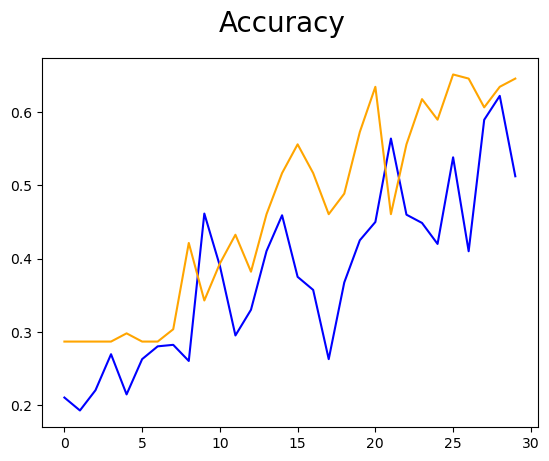

In [3]:
fig = plt.figure()
plt.plot(fitting.history['accuracy'], color ='blue', label = 'accuracy')
plt.plot(fitting.history['val_accuracy'], color ='orange', label = 'val_accuracy')
plt.suptitle('Accuracy', fontsize=20)

plt.show()


In [46]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory('C:/Users/Rana Wael/Documents/Slash/data/validation', 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 59 images belonging to 5 classes.


In [21]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
fine_tuning=model.fit(train_generator, epochs=35, batch_size=36, validation_data=validation_generator)

Epoch 1/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.3124 - loss: 2.1217 - val_accuracy: 0.7191 - val_loss: 0.9595
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.6248 - loss: 0.9821 - val_accuracy: 0.8258 - val_loss: 0.6029
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.6862 - loss: 0.7678 - val_accuracy: 0.8315 - val_loss: 0.5357
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.7011 - loss: 0.9220 - val_accuracy: 0.8596 - val_loss: 0.3705
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.7734 - loss: 0.5849 - val_accuracy: 0.9382 - val_loss: 0.2710
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.8306 - loss: 0.4482 - val_accuracy: 0.9157 - val_loss: 0.2763
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.8152 - loss: 0.4528 - val_accuracy: 0.9326 - val_loss: 0.2184
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.8151 - loss: 0.5102 - val_accuracy: 0.9775 - val_loss:

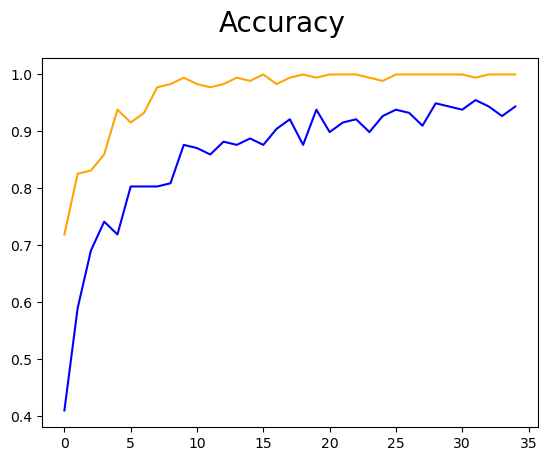

In [22]:
fig = plt.figure()
plt.plot(fine_tuning.history['accuracy'], color ='blue', label = 'accuracy')
plt.plot(fine_tuning.history['val_accuracy'], color ='orange', label = 'val_accuracy')
plt.suptitle('Accuracy', fontsize=20)

plt.show()


In [47]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9471 - loss: 0.4671
Test Loss: 0.2807759940624237
Test Accuracy: 0.9491525292396545
